# EDA 2

## Hacer preguntas

#### Ejemplos

- ¿Qué pasaría si sólo se hubiera analizado un grupo étnico?​
- ¿Qué pasaría si el dataset sólo tuviera estudiantes de un solo género?​
- ¿Qué pasaría si ningún estudiante hubiera completado el curso?​
- ¿Qué pasaría si el promedio de calificaciones fuera irregular?​

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('data/StudentsPerformance.csv')

In [2]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
df_free = (
    df[df.lunch == 'free/reduced']
    .drop('lunch', axis=1)
    .assign(
        mean_score = lambda df: (df.math_score + df.reading_score + df.writing_score) / 3
    )
    .sort_values(
        by='mean_score',
        ascending=False
    )
    )
df_free

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,mean_score
149,male,group E,associate's degree,completed,100,100,93,97.666667
903,female,group D,bachelor's degree,completed,93,100,100,97.666667
566,female,group E,bachelor's degree,completed,92,100,100,97.333333
377,female,group D,master's degree,completed,85,95,100,93.333333
514,female,group B,master's degree,completed,77,97,94,89.333333
...,...,...,...,...,...,...,...,...
17,female,group B,some high school,none,18,32,28,26.000000
327,male,group A,some college,none,28,23,19,23.333333
596,male,group B,high school,none,30,24,15,23.000000
980,female,group B,high school,none,8,24,23,18.333333


In [14]:
df_free.describe()

,math_score,reading_score,writing_score,mean_score
count,355.000000,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535,62.199061
std,15.159956,14.895339,15.433823,14.458324
min,0.000000,17.000000,10.000000,9.000000
25%,49.000000,56.000000,53.000000,52.833333
50%,60.000000,65.000000,64.000000,62.666667
75%,69.000000,75.000000,74.000000,72.500000
max,100.000000,100.000000,100.000000,97.666667


In [18]:
df_free.select_dtypes(include=object).columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education',
       'test_preparation_course'],
      dtype='object')

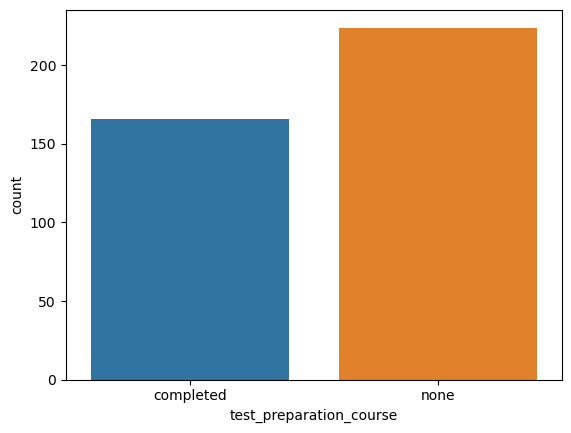

In [19]:
for category in df_free.select_dtypes(include=object).columns:
    sns.countplot(
        x=df_free[category]
    )